# Assingment 3

## Titanic Dataset

In [2]:
library(ggplot2)
library(readxl)
Titanic_Data <- read_excel("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 12/Titanic Data.xlsx")
a3 = Titanic_Data

### Data Cleaning and Manipulation (Questions 1-4)

In [3]:
a3$Survived = factor(a3$Survived)
a3$Pclass = factor(a3$Pclass)
a3$Sex = factor(a3$Sex)
sum(is.na(a3))
x = mean(a3$Age, na.rm = TRUE)
a3[is.na(a3$Age),]$Age = x
a3[,1] = NULL
a3[,"Ticket"] = NULL
a3[,"Cabin"] = NULL
a3 = na.omit(a3)

[1] 866

### Dataset Calculations (Questions 5-10)

In [4]:
mean(a3$Age)
mean(a3[a3$Sex == "female",]$Age)
median(a3[a3$Pclass == "1",]$Fare)
median(a3[a3$Survived == "1" & a3$Sex == "female" & a3$Pclass != "3",]$Age)
mean(a3[a3$Sex == "female" & a3$Survived == "1" & a3$Age >= "13" & a3$Age < "20",]$Fare)

[1] 29.65345

[1] 28.07709

[1] 58.6896

[1] 30

[1] 47.511

### Dataset Calculations (Question 11)

In [5]:
mean(a3[a3$Sex == "female" & a3$Survived == "1" & a3$Age >= "13" & a3$Age < "20" & a3$Pclass == "1",]$Fare)
mean(a3[a3$Sex == "female" & a3$Survived == "1" & a3$Age >= "13" & a3$Age < "20" & a3$Pclass == "2",]$Fare)
mean(a3[a3$Sex == "female" & a3$Survived == "1" & a3$Age >= "13" & a3$Age < "20" & a3$Pclass == "3",]$Fare)

[1] 107.5407

[1] 20.67453

[1] 9.021143

### Dataset Calculations (Question 12)

In [6]:
avgfare = mean(a3$Fare)
a3a = a3[a3$Fare>avgfare,]
prop.table(table(a3a$Survived))


        0         1 
0.4066986 0.5933014 

### Standardization of Fare (Question 13)

In [7]:
a3$sfare = (a3$Fare - avgfare) / sd(a3$Fare)

### Data Plots (Questions 14-16)

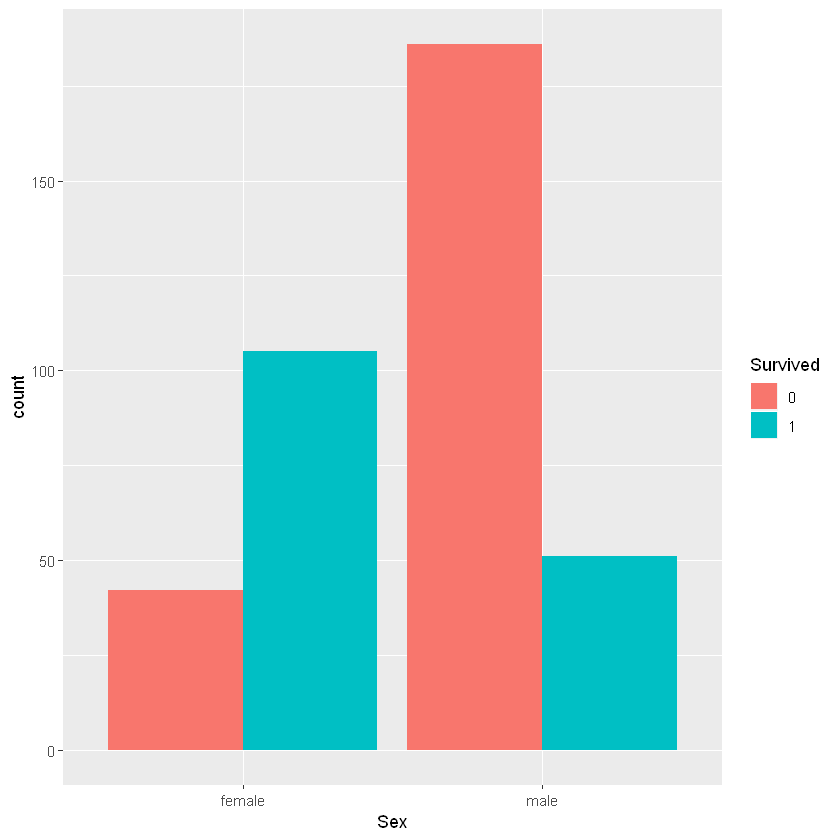

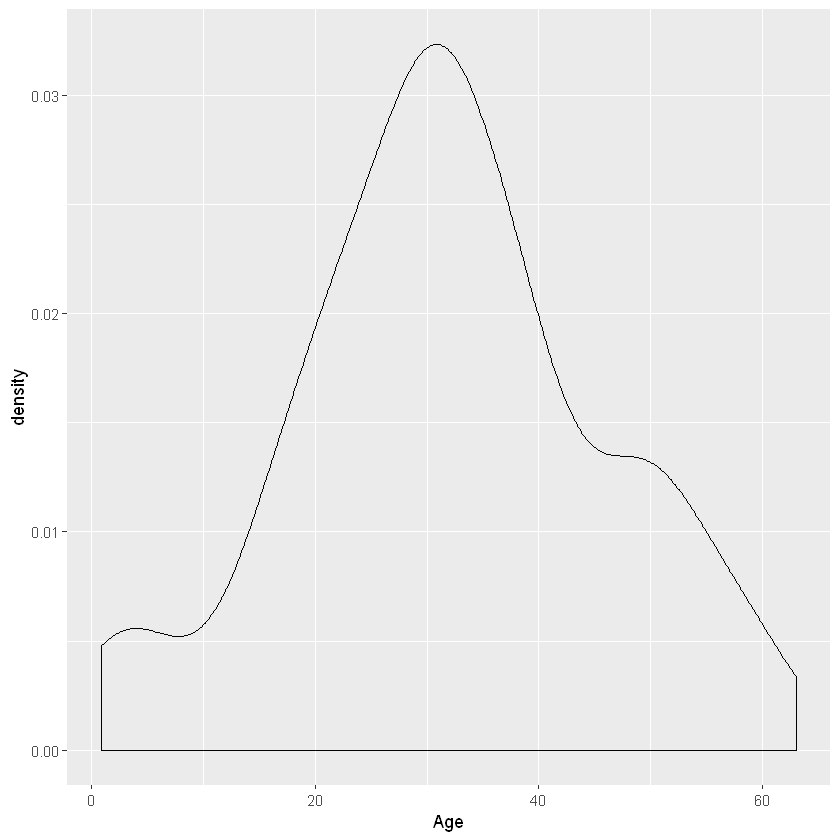

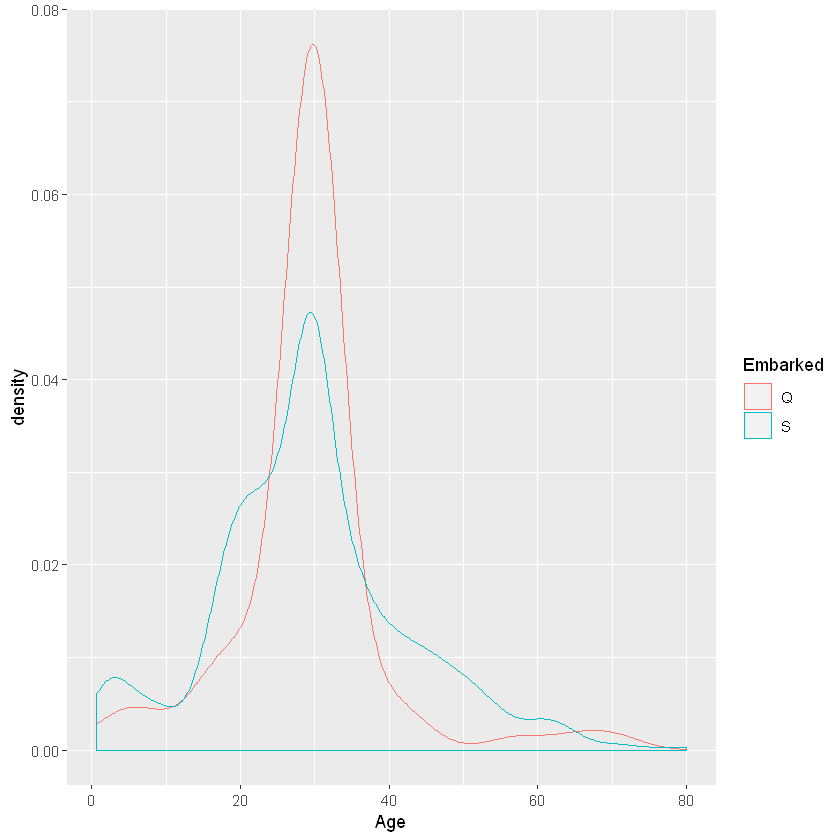

In [8]:
ggplot(a3[a3$Age < x,], aes(x = Sex, fill = Survived)) + geom_bar(position = "dodge")
ggplot(a3[a3$Survived =="1" & a3$Fare > avgfare,], aes(x=Age)) + geom_density()
ggplot(a3[a3$Embarked == "S" | a3$Embarked == "Q",], aes(x = Age, color = Embarked)) + geom_density()

### Adding More Variables (Questions 17-18)

In [9]:
a3$cfare = ifelse(a3$Fare <= avgfare, "cheap", "expensive")
attach(a3)
a3$cage[Age <= 10] = "1"
a3$cage[Age > 10 & Age <= 20] = "2"
a3$cage[Age > 20 & Age <= 30] = "3"
a3$cage[Age > 30 & Age <= 40] = "4"
a3$cage[Age > 40 & Age <= 50] = "5"
a3$cage[Age > 50 & Age <= 60] = "6"
a3$cage[Age > 60 & Age <= 70] = "7"
a3$cage[Age > 70 & Age <= 80] = "8"
a3$cage[Age > 80 & Age <= 90] = "9"
a3$cage[Age > 90 & Age <= 100] = "10"
detach(a3)

Warning message:
"Unknown or uninitialised column: 'cage'."

### More Bar Charts (Questions 19-20)

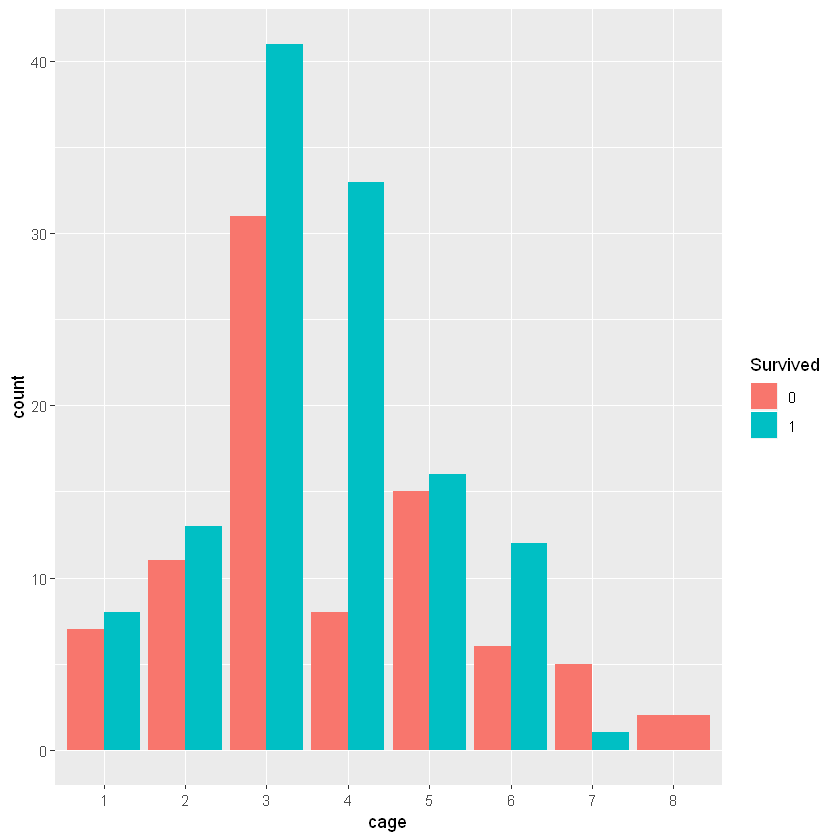

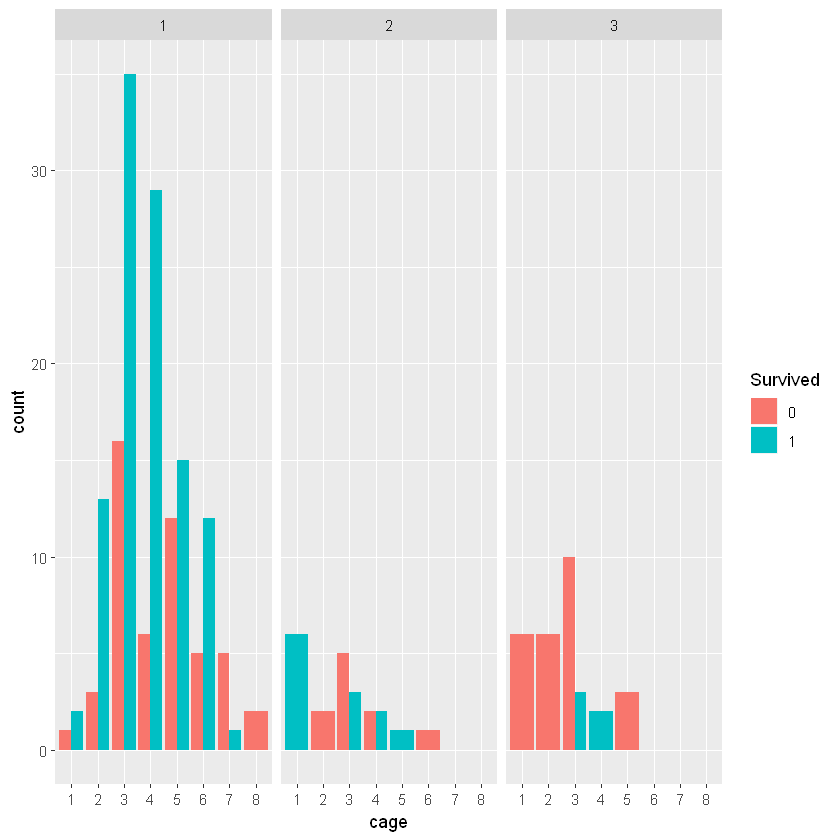

In [10]:
ggplot(a3[a3$Fare > avgfare,], aes(x = cage, fill = Survived)) + geom_bar(position = "dodge")
ggplot(a3[a3$Fare > avgfare,], aes(x = cage, fill = Survived)) + geom_bar(position = "dodge") + facet_wrap(~ Pclass)